In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import keras
from sklearn.mixture import GaussianMixture
from sklearn.svm import OneClassSVM
from sklearn import mixture
from scipy.spatial import distance
from tqdm.notebook import tqdm
import seaborn
import matplotlib.pyplot as plt
#from ipywidgets import IntProgress


In [2]:

def load_images_from_folder(folder):
    images = []
    for filename in tqdm(sorted(os.listdir(folder))):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        if img is not None:
            images.append(img)
    return np.array(images)

path = load_images_from_folder("/home/ws575033/thesis_nb/Train_fin/")
path.shape

  0%|          | 0/110 [00:00<?, ?it/s]

(110, 224, 224, 3)

In [ ]:


#####Model for extracting features
mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)


In [3]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
Xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
resnet50v2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96, 96, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
Inception_ResNetv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96, 96, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
effnetB3 = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB3.summary()
model = effnetB3  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6f_add'
intermediate_layer_modelb3 = keras.Model(inputs=model.input,
                                        outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb3.summary()

In [ ]:
effnetB4 = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB4.summary()
model = effnetB4  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6h_add'
intermediate_layer_modelb4 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb4.summary()

In [ ]:
effnetB5 = tf.keras.applications.EfficientNetB5(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB5.summary()
model = effnetB5  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6i_add'
intermediate_layer_modelb5 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb5.summary()

In [ ]:
effnetB6 = tf.keras.applications.EfficientNetB6(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB6.summary()
model = effnetB6  # create the original model
inputs = (128, 128, 3)
layer_name = 'block6k_add'
intermediate_layer_modelb6 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb6.summary()

In [ ]:
effnetB7 = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96, 96, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [4]:
%%time

#model predict
features = vgg16.predict(
    path,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
features.shape

CPU times: user 42.8 s, sys: 4.09 s, total: 46.9 s
Wall time: 1.74 s


(110, 7, 7, 512)

In [5]:
features_linear = features.reshape(-1, features.shape[-1])
features_linear.shape

(5390, 512)

In [6]:
%%time
#from sklearn.mixture import GaussianMixture
#Gaussian mixture model
#gm = GaussianMixture(n_components=1, random_state=0).fit(features_linear)
#print("gm", gm)
#mvg = gm.sample()
#plt.imshow(mvg)
#seaborn.distplot(mvg)
#print("gm_means", gm.means_.shape)
#print("gm_covariance", gm.covariances_.shape)
#inv_cov = np.linalg.inv(gm.covariances_)
#print("inv_covariance", inv_cov)


from sklearn.svm import OneClassSVM
svm = OneClassSVM(gamma='scale').fit(features_linear)

CPU times: user 5.23 s, sys: 25.5 ms, total: 5.26 s
Wall time: 5.26 s


In [ ]:
print(svm.support_vectors_.shape)
print(svm.support_.shape)
print(svm.fit_predict.shape)

In [7]:
%%time
###################Test per frame##############################
test_image = load_images_from_folder("/home/ws575033/thesis_nb/Test_fin")
#print("Test_image", test_image.shape)
dist_list=[]
for i in range(len(test_image)):
    tes = test_image[i]
    tes = np.expand_dims(tes, axis=0)
    #extract features
    features2 = vgg16.predict(
    tes,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )
    #print(features2.shape)

    #for i in range(features2.shape[0]):
    
    features2_linear = features2.reshape(-1, features2.shape[-1])
    #print("features2_shape", features2_linear.shape)

    #Mahalonobis distance
    #maha = distance.cdist(svm.support_vectors_, features2_linear, 'mahalanobis')
    maha = svm.decision_function(features2_linear) 
    #seaborn.distplot(maha)
    #plt.imshow(maha)
    #seaborn.distplot(gm.means_)
    #plt.imshow(gm.means_)
    #print("mahalonobis distance shape", maha.shape)
    #print("mahalonobis distance", maha)
    print(i, "mahalonobis distance ------------------------------>>>>>>>", max(abs(maha)))
    
    dist_list.append(max(abs(maha)))
dist_list = np.array(dist_list)
dist_list.shape

  0%|          | 0/422 [00:00<?, ?it/s]

0 mahalonobis distance ------------------------------>>>>>>> 736.6694762449341
1 mahalonobis distance ------------------------------>>>>>>> 734.312261765246
2 mahalonobis distance ------------------------------>>>>>>> 737.3877733742224
3 mahalonobis distance ------------------------------>>>>>>> 737.4170820584677
4 mahalonobis distance ------------------------------>>>>>>> 735.3913641747079
5 mahalonobis distance ------------------------------>>>>>>> 736.4934844508398
6 mahalonobis distance ------------------------------>>>>>>> 733.9721595258362
7 mahalonobis distance ------------------------------>>>>>>> 734.1936297575248
8 mahalonobis distance ------------------------------>>>>>>> 736.2241746544297
9 mahalonobis distance ------------------------------>>>>>>> 734.9172126474813
10 mahalonobis distance ------------------------------>>>>>>> 732.7840513017477
11 mahalonobis distance ------------------------------>>>>>>> 735.0781708148703
12 mahalonobis distance ---------------------------

103 mahalonobis distance ------------------------------>>>>>>> 719.5781134537885
104 mahalonobis distance ------------------------------>>>>>>> 714.6535683030843
105 mahalonobis distance ------------------------------>>>>>>> 716.07606464177
106 mahalonobis distance ------------------------------>>>>>>> 733.8794215842312
107 mahalonobis distance ------------------------------>>>>>>> 751.221886045259
108 mahalonobis distance ------------------------------>>>>>>> 751.7823180212124
109 mahalonobis distance ------------------------------>>>>>>> 731.5856831729335
110 mahalonobis distance ------------------------------>>>>>>> 736.394177823479
111 mahalonobis distance ------------------------------>>>>>>> 751.7046082288914
112 mahalonobis distance ------------------------------>>>>>>> 746.6588270825484
113 mahalonobis distance ------------------------------>>>>>>> 747.7024698110636
114 mahalonobis distance ------------------------------>>>>>>> 751.8211494403831
115 mahalonobis distance -------

205 mahalonobis distance ------------------------------>>>>>>> 721.3567336636776
206 mahalonobis distance ------------------------------>>>>>>> 730.7510758252578
207 mahalonobis distance ------------------------------>>>>>>> 738.3937438440292
208 mahalonobis distance ------------------------------>>>>>>> 738.5017663931886
209 mahalonobis distance ------------------------------>>>>>>> 740.0413198047677
210 mahalonobis distance ------------------------------>>>>>>> 734.5526423346599
211 mahalonobis distance ------------------------------>>>>>>> 751.8881624224736
212 mahalonobis distance ------------------------------>>>>>>> 751.9050581927594
213 mahalonobis distance ------------------------------>>>>>>> 751.8559190123232
214 mahalonobis distance ------------------------------>>>>>>> 751.9404395444235
215 mahalonobis distance ------------------------------>>>>>>> 751.9429280255911
216 mahalonobis distance ------------------------------>>>>>>> 751.9429130942507
217 mahalonobis distance ---

307 mahalonobis distance ------------------------------>>>>>>> 732.318402422521
308 mahalonobis distance ------------------------------>>>>>>> 738.8822082974112
309 mahalonobis distance ------------------------------>>>>>>> 746.3164700132958
310 mahalonobis distance ------------------------------>>>>>>> 745.9424456435083
311 mahalonobis distance ------------------------------>>>>>>> 745.0841710648021
312 mahalonobis distance ------------------------------>>>>>>> 751.9424521338323
313 mahalonobis distance ------------------------------>>>>>>> 751.8988707769981
314 mahalonobis distance ------------------------------>>>>>>> 751.9013474190365
315 mahalonobis distance ------------------------------>>>>>>> 751.7326193093389
316 mahalonobis distance ------------------------------>>>>>>> 751.6748660802748
317 mahalonobis distance ------------------------------>>>>>>> 750.9502006902368
318 mahalonobis distance ------------------------------>>>>>>> 751.3683617696853
319 mahalonobis distance ----

409 mahalonobis distance ------------------------------>>>>>>> 751.9418538529335
410 mahalonobis distance ------------------------------>>>>>>> 749.0916271129493
411 mahalonobis distance ------------------------------>>>>>>> 751.5241698734515
412 mahalonobis distance ------------------------------>>>>>>> 751.8582614943969
413 mahalonobis distance ------------------------------>>>>>>> 751.8385335753607
414 mahalonobis distance ------------------------------>>>>>>> 751.8346339665728
415 mahalonobis distance ------------------------------>>>>>>> 751.8350194497141
416 mahalonobis distance ------------------------------>>>>>>> 751.6858090752006
417 mahalonobis distance ------------------------------>>>>>>> 751.9419718176001
418 mahalonobis distance ------------------------------>>>>>>> 751.8171760381854
419 mahalonobis distance ------------------------------>>>>>>> 751.933083941051
420 mahalonobis distance ------------------------------>>>>>>> 751.7436983818303
421 mahalonobis distance ----

(422,)

In [ ]:
max(dist_list)

In [ ]:
%%time
################### Test per patch ###########################
test_image = load_images_from_folder("/home/ws575033/thesis_nb/Data_set/grid_values/cross/")
print("Test_image", test_image.shape)
dist_list=[]
for i in range(len(test_image)):
    tes = test_image[i]
    tes = np.expand_dims(tes, axis=0)
    #extract features
    features2 = intermediate_layer_modelb4.predict(
    tes,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )
    #print(features2.shape)

    #for i in range(features2.shape[0]):
    
    features2_linear = features2.reshape(-1, features2.shape[-1])
    #print("features2_shape", features2_linear.shape)

    #Mahalonobis distance
    #maha = distance.cdist(svm.support_vectors_, features2_linear, 'mahalanobis')
    maha = svm.decision_function(features2_linear) 
    #seaborn.distplot(maha)
    #plt.imshow(maha)
    #seaborn.distplot(gm.means_)
    #plt.imshow(gm.means_)
    #print("mahalonobis distance shape", maha.shape)
    print("mahalonobis distance", maha.reshape(-1, 7))
    print(i, "mahalonobis distance ------------------------------>>>>>>>", max(abs(maha)))
    #dist_list.append(maha)
    #mx = max(abs(maha))
    dist_list.append(maha)
dist_list = np.array(dist_list)
dist_list.shape


In [ ]:
# ######################## Heat Map ##########################

import pandas as pd
import seaborn as sns 
import dataframe_image as dfi 
import numpy as np  

for i in range(dist_list.shape[0]): 
    x = dist_list[i].reshape(7,7)
    fig = plt.figure()
#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
    ax= sns.heatmap(x,vmin=-820,vmax=-800,  cmap='Set1',annot=False,cbar=False)
    #ax= sns.heatmap(x,vmin=30,vmax=40,  cmap='Set1_r',annot=True,cbar=False)#bone, copper
    ax.axis('off')
    fig.set_size_inches(640/100,480/100)
    plt.tight_layout()
    #plt.show()
    fig.savefig(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross{i}.jpg",pad_inches=0.1, dpi=100)

In [ ]:
for file in os.listdir('/home/ws575033/thesis_nb/Data_set/grid_values/cross/'):
    n = file.split(".")[0]
    img1 = cv2.imread(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross{n}.jpg")
    img2 = cv2.imread(f'/home/ws575033/thesis_nb/Data_set/grid_values/cross/{n}.jpg')

    body = img1[14:-14, 14:-14]

    width= 640
    hight= 480
    dim=(width, hight)
    img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


    dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

    cv2.imwrite(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross_{n}.jpg", dst)
    plt.imshow(dst)

In [ ]:
######################## Data Frame ##########################

import pandas as pd
d = pd.DataFrame()
for i in range(7):
    d[str(i)] = maha.reshape(7,7)[:,i]
d

# import pandas as pd
# import numpy as np

# def highlight_max(s):
#     is_max = s == -mx
#     return ['background-color: red' if v else '' for v in is_max]

# d.style.apply(highlight_max)

In [ ]:
# ######################## Heat Map ##########################

# import pandas as pd
# import seaborn as sns
# import dataframe_image as dfi


# # displaying dataframe as an heatmap 
# # with diverging colourmap as virdis
# fig = plt.figure()
# #supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
# ax= sns.heatmap(d,cmap='Purples_r',annot=True,cbar=False)
# ax.axis('off')
# fig.set_size_inches(640/100,480/100)
# plt.tight_layout()
# plt.show()
# fig.savefig("/home/ws575033/thesis_nb/Data_set/grid_values/res/plank1.jpg",pad_inches=0.1, dpi=100) #,bbox_inches='tight'

In [ ]:
# ############################ Plot Blended Image ########################

# import cv2
# import matplotlib.pyplot as plt


# img1 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/res/plank1.jpg")
# img2 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/plank1/14.jpg")

# body = img1[14:-14, 14:-14]

# width= 640
# hight= 480
# dim=(width, hight)
# img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


# dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

# cv2.imwrite("/home/ws575033/thesis_nb/Data_set/grid_values/res/plank1_g.jpg", dst)
# plt.imshow(dst)

In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
    
# # Take two images for blending them together   
# image1 = Image.open('/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/1590668982109888984.jpg')
# image2 = Image.open("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol1.jpg")

# # Make sure images got an alpha channel
# image5 = image1.convert("RGBA")
# image6 = image2.convert("RGBA")


# # alpha-blend the images with varying values of alpha
# alphaBlended = Image.blend(image5, image6, alpha=.4)

# # Display the alpha-blended images
# #alphaBlended.show()
# plt.savefig('/home/ws575033/thesis_nb/Data_set/grid_values/res/trol1_g.jpg', bbox_inches='tight')
# plt.imshow(alphaBlended)

In [ ]:
# import matplotlib.pyplot as plt
# from skimage import data
# from skimage.filters import threshold_otsu, threshold_mean, threshold_triangle
# from skimage.color import rgb2gray

# test_image = load_images_from_folder("Test2/")
# test_image = rgb2gray(test_image[0])
# #thresh = threshold_triangle(test_image)
# #binary = test_image > thresh

# fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
# ax = axes.ravel()
# ax[0] = plt.subplot(1, 3, 1)
# ax[1] = plt.subplot(1, 3, 2)
# ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

# ax[0].imshow(test_image, cmap=plt.cm.gray)
# ax[0].set_title('Original')
# ax[0].axis('off')

# ax[1].hist(test_image.ravel(), bins=256)
# ax[1].set_title('Histogram')
# ax[1].axvline(thresh, color='r')

# ax[2].imshow(binary, cmap=plt.cm.gray)
# ax[2].set_title('Thresholded')
# ax[2].axis('off')

# plt.show()

In [ ]:
import os
def load_folder_rgb(path, ext="jpg", sz=(224, 224)):
    files= os.listdir(path)
    result = []
    for file in files:
        if ext in file:
            img=cv2.imread(path+file)
            img = cv2.resize(img, sz)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_hsv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
            result.append(img_hsv)

    return np.array(result)


In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_mean, threshold_triangle, threshold_minimum
from skimage.color import rgb2gray

#test_image = load_images_from_folder("Test1/")
img=cv2.imread("/home/ws575033/thesis_nb/Test1/1590667323098235798.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img_rgb.copy()
output_img[np.where(mask==0)] = 0

opt_img= rgb2gray(img_rgb)
thresh = threshold_minimum(opt_img)
binary = opt_img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_rgb, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(opt_img.ravel(), bins=100)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(output_img)
ax[2].set_title('Mask')
ax[2].axis('off')

plt.show()

In [ ]:
arr = np.array(maha)
arr.max(), arr.min()

In [ ]:
if maha.max()>17:
  print("ANOMALY")
else:
  print("NO ANOMALY")

In [ ]:
output = arr.max()>100

In [ ]:
########################################### METRICS ################################################

In [8]:
########################################### per frame ################################################
import pandas as pd
from sklearn.metrics import accuracy_score
p = pd.read_csv("/home/ws575033/thesis_nb/test_fin.csv")
p.head()
p.labels


0      0
1      0
2      0
3      0
4      0
      ..
417    1
418    1
419    1
420    1
421    1
Name: labels, Length: 422, dtype: int64

In [ ]:
########################################### per patch ################################################
import pandas as pd
from sklearn.metrics import accuracy_score
p = pd.read_csv("/home/ws575033/thesis_nb/Data_set/grid_values/cross.csv")
p


In [ ]:
#################################### AUC_ROC curve ########################

import numpy as np

def roc_curve_calculation(y_true, prediction, thresholds):

    fpr = []
    tpr = []
    acc = []

    for threshold in thresholds:

        y_pred = np.where(prediction <= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        

    return fpr, tpr

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
import numpy as np

a= np.arange(-1000, 1000,0.01)
acc = []
ktf = []
rtf = []
fpr_list = []
tpr_list = []

fpr, tpr = roc_curve_calculation(p.values.flatten(), d.values.flatten(), a)

# import pickle
# filename = 'svm_Xception_fpr'
# outfile = open(filename,'wb')
# pickle.dump(fpr,outfile)
# outfile.close()

# filename = 'svm_Xception_tpr'
# outfile = open(filename,'wb')
# pickle.dump(tpr,outfile)
# outfile.close()


roc_auc = auc(fpr, tpr)
#plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',
             lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (MobilenetV2) ')
plt.legend(loc="lower right") 
plt.show()

In [ ]:
tpr

In [ ]:
fpr

In [ ]:
kt = d<-5100
kt  = kt.values.flatten()
accuracy_score(kt, p.values.flatten())

In [ ]:
######### accuracy per pixel #########
acc = []

for i in range(-1000, 1000,1):
    
    axi = accuracy_score(d.values.flatten()<i, p.values.flatten())
    acc.append(axi)
    f = max(acc)
    g = acc.index(f)
g,f


In [ ]:
######### f1_Score per pixel #########
from sklearn.metrics import f1_score
f1_score(d.values.flatten()<500, p.values.flatten(), zero_division=1)

In [ ]:
######### f1_Score #########
from sklearn.metrics import f1_score
f1_score(dist_list>851, p.labels, zero_division=1)

In [ ]:
######### confusion_matrix #########
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(ktf[ac], rtf[ac])
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:

z = np.abs(dist_list)

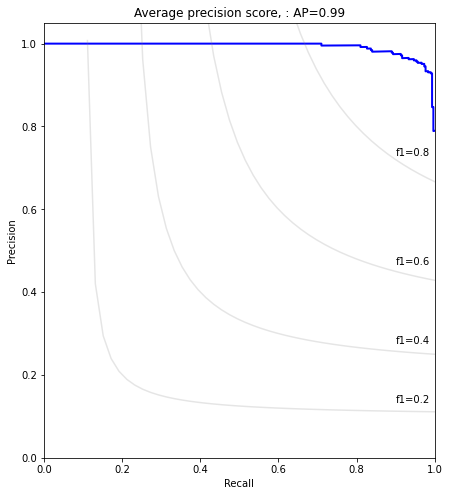

In [12]:
######### Precision_curve #########
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import pickle

precision, recall, thresholds = precision_recall_curve(p.labels, dist_list)


plt.figure(figsize=(7, 8))
plt.plot(recall, precision, color='blue', lw=2)
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
average_precision = average_precision_score(p.labels, dist_list)

plt.title(
    'Average precision score, : AP={0:0.2f}'
    .format(average_precision))

filename = 'svm_vgg16_p.lab'
outfile = open(filename,'wb')
pickle.dump(p.labels,outfile)
outfile.close()

filename = 'svm_vgg16_dist'
outfile = open(filename,'wb')
pickle.dump(dist_list,outfile)
outfile.close()

In [10]:
average_precision

0.9928273492074533

In [ ]:
labels, np.asarray(dist_list>30, dtype=np.float)

In [ ]:
#################################### AUC_ROC curve ########################
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(p.values.flatten(), np.asarray(kt, dtype=np.float))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve OC_SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (EfficientNet_B4) ')
plt.legend(loc="lower right")
plt.show()

#roc_auc

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

p = pd.read_csv("models_accuracy.csv")
p.head()

In [ ]:
disp = plt.bar(p.Model, p.Accuracy)